# PERIODI DI OSCILLAZIONE

variando la posizione di una massa vengono raccolti i periodi di oscillazione del pendolo, l'esperimento viene poi ripetuto ruotando il pendolo



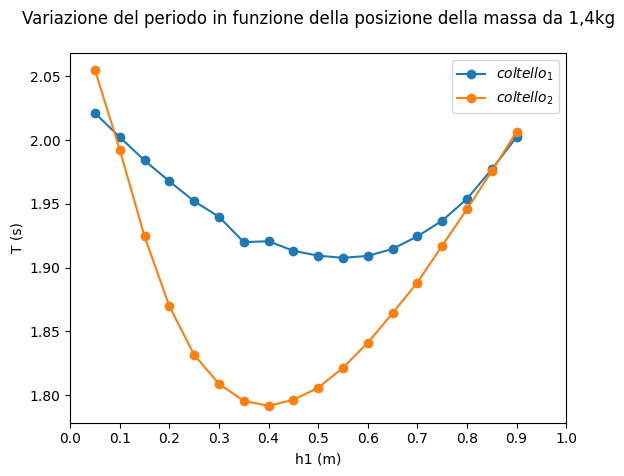

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os

dir_path = os.path.abspath('')
FILE = dir_path + '/../CSV/' + 'parabole.csv'
fr = pd.read_csv(FILE)

d = np.array(fr['d1(cm)']) * 0.01 # m

t1 = np.array(fr['t1']) # s
t2 = np.array(fr['t2']) # s

plt.title('Variazione del periodo in funzione della posizione della massa da 1,4kg\n')
plt.plot(d,t1,'o-',label="$coltello_1$")
plt.plot(d,t2,'o-',label='$coltello_2$')
plt.legend()
plt.xticks(np.linspace(0,1,11))
plt.ylabel('T (s)')
plt.xlabel('h1 (m)')
plt.show()

#### VENGONO ORA FATTE MISURE PIÙ FITTE ATTORNO AL PUNTO DI INTERSEZIONE

nell'intorno dell'intersezione le parabole possono essere approssimate da una retta

[0.0006364  0.00050249 0.00027386 0.00017321 0.00049749 0.00075664
 0.00037666 0.00026926 0.00068739] [3.35410197e-04 2.16506351e-04 4.35889894e-04 3.34477204e-04
 4.33012702e-05 7.52911017e-04 1.47901995e-04 1.58113883e-04
 2.16506351e-04]


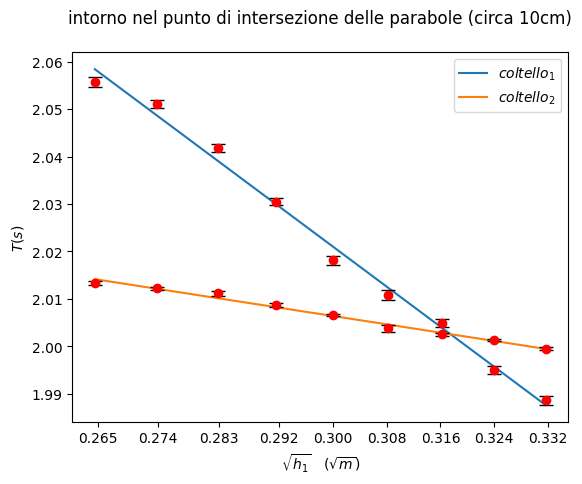


linearità A + BX
    
A: 2.337602491312939 
B: -1.055272604222471
sigmaA: 0.010196523734295259
sigmaB: 0.03398841229855687

sigmaY: [0.00097229 0.00089042 0.00078444 0.00075521 0.00088761 0.00105491
 0.00082597 0.00078284 0.0010064 ]
chiquadro ridotto: 6.23
df: 7
pvalue: 51.3%
    
 
linearità A + BX
    
A: 2.072128349088105 
B: -0.21910905567251696
sigmaA: 0.0029542326522648196
sigmaB: 0.009847441846469107

sigmaY: [0.00039731 0.0003037  0.00048514 0.00039653 0.00021733 0.00078245
 0.00025929 0.00026525 0.0003037 ]
chiquadro ridotto: 2.1
df: 7
pvalue: 95.4%
    



In [2]:
from interpolazione3 import RettaInterpolata

dir_path = os.path.abspath('')
FILE = dir_path + '/../CSV/' + 'misure_fini.csv'
fr = pd.read_csv(FILE)

h1 = (np.array(fr['d'])) * 0.01

# deviazione standard
def dev_std(a: np.ndarray) -> np.float64:
    mean = np.mean(a)
    return np.sqrt((np.sum(((a - mean)**2))/(len(a)-1)))#/np.sqrt(len(a))

t1 =np.array(fr["t1"]) # s
t2 =np.array(fr["t2"])
t3 =np.array(fr["t3"])
t4 =np.array(fr["t4"])
T1 =np.array(fr["T1"])
T2 =np.array(fr["T2"])
T3 =np.array(fr["T3"])
T4 =np.array(fr["T4"])

dev_stdt = np.array([np.std([t1[i],t2[i],t3[i],t4[i]]) for i in range(0,len(h1))])
dev_stdT = np.array([np.std([T1[i],T2[i],T3[i],T4[i]]) for i in range(0,len(h1))])

periodo1 = np.array(fr["AVG t"])
periodo2 = np.array(fr["AVG T"])

h1_sqrt = np.sqrt(h1)
print(dev_stdt,dev_stdT)
r1 = RettaInterpolata(h1_sqrt,periodo1, dev_stdt)
r2 = RettaInterpolata(h1_sqrt,periodo2, dev_stdT)

plt.plot(r1.x_best,r1.y_best,label="$coltello_1$")
plt.plot(r2.x_best,r2.y_best,label="$coltello_2$")
plt.errorbar(h1_sqrt,periodo1,fmt='o',yerr=r1.sigmaY,color="red",ecolor="black",capsize=5)
plt.errorbar(h1_sqrt,periodo2,fmt='o',yerr=r2.sigmaY,color="red",ecolor="black",capsize=5)

plt.legend()
plt.title("intorno nel punto di intersezione delle parabole (circa 10cm)\n")
plt.xticks(np.round(h1_sqrt,3))
plt.ylabel('$T (s)$')
plt.xlabel("$\sqrt{h_1}\quad(\sqrt{m})$")
plt.show()

print(r1,r2)

## MISURA DEL PERIODO

misuriamo il periodo in due modi differenti:


### metodo A
$
T^* = \frac{T_2(x_a)T_1(x_b) - T_1(x_a)T_2(x_b)}{T_1(x_b)-T_2(x_b)-T_1(x_a)+T_2(x_a)}
$

dove $x_a$ e $x_b$ sono i punti più vicini all'intersezione

### medoto B
$
\left \{ \begin{array}{rl}
T = A_1 + B_1\sqrt{h}\\
T = A_2 + B_2\sqrt{h}
\end{array}
\right. \Rightarrow 
T^* = \frac{A_1B_2 - A_2B_1}{B_2-B_1}
$

dove $A$ e $B$ sono i parametri delle rette interpolate


In [3]:
#metodo A
xa = h1_sqrt[6]
xb = h1_sqrt[7]

T1 = lambda x: r1.A + r1.B * x
T2 = lambda x: r2.A + r2.B * x

T_A = (T2(xa)*T1(xb) - T1(xa)*T2(xb))/(T1(xb)-T2(xb)-T1(xa)+T2(xa))
print("T* metodo A: ",T_A)

#metodo B
T_B = (r1.A*r2.B - r2.A * r1.B) / (r2.B - r1.B)
print("T* metodo B: ",T_B)

T* metodo A:  2.00256326375379
T* metodo B:  2.0025632637537494


### PROPAGAZIONE DEGLI ERRORI

I valori di $T^*$ ottenuti mediante A e B risultano essere corrispondenti per le prime 12 ciffre dopo lo zero

studiamo ora l'errore con cui assumiamo questi valori:

In [4]:
# metodo A
sT1a = r1.sigmaY[6]
sT1b = r1.sigmaY[7]
sT2a = r2.sigmaY[6]
sT2b = r2.sigmaY[7]

no = np.sqrt((sT2a/T2(xa))**2 + (sT1b/T1(xb))**2) * (T2(xa) * T1(xb))
ne = np.sqrt((sT1a/T1(xa))**2 + (sT2b/T2(xb))**2) * (T1(xa) * T2(xb))
s = np.sqrt(sT1a**2 + sT1b**2 + sT2a**2 + sT2b**2)
n = np.sqrt(no**2 + ne**2)

sigmaT_A = np.sqrt((n/(T2(xa)*T1(xb) - T1(xa)*T2(xb)))**2 + (s/(T1(xb)-T2(xb)-T1(xa)+T2(xa)))**2) * T_A
print(sigmaT_A)

# metodo B
no = (r1.A*r2.B) * np.sqrt((r1.sigmaA/r1.A)**2 + (r2.sigmaB/r2.B)**2)
ne = (r2.A*r1.B) * np.sqrt((r2.sigmaA/r2.A)**2 + (r1.sigmaB/r1.B)**2)
s = np.sqrt(r1.sigmaB**2 + r2.sigmaB**2)
n = np.sqrt(no**2 + ne**2)

sigmaT_B = T_B * np.sqrt((n/(r1.A*r2.B - r2.A * r1.B))**2 + (s/(r2.B - r1.B))**2)
print(sigmaT_B)

# metodo C
T_C = r1.A + r1.B * (r2.A - r1.A)/(r1.B - r2.B)
n = np.sqrt(r1.sigmaA**2 + r2.sigmaA**2)
s = np.sqrt(r1.sigmaB**2 + r2.sigmaB**2)
x = ((r2.A - r1.A)/(r1.B - r2.B)) * np.sqrt((n/(r2.A - r1.A))**2 + (s/(r1.B - r2.B))**2)
bx = r1.B * ((r2.A - r1.A)/(r1.B - r2.B)) * np.sqrt((x/((r2.A - r1.A)/(r1.B - r2.B)))**2 + (r1.sigmaB/r1.B)**2)
sigmaT_C = np.sqrt(bx**2 + r1.sigmaA**2)

print(T_C, sigmaT_C)

0.5190163260058698
0.1227008217904206
2.0025632637537494 0.02451427270401631
